# Goodreads Recommender System

## Essential Purpose:
Creating a book recommender system in Python.
## Skills tested:
Using Pandas to access and explore the dataset.
Using Pandas and Python in creating a simple popularity-based book recommender system.
Using the Scikit-Learn implementation of TF-IDF Vectorizer in creating a content-based filtering recommender system for book recommendations.
Using the Scikit-Learn distance matrices in calculating preferences in the recommender system.
A dataset of books from Goodreads known for use in recommendation engines.
Columns Description:
bookID contains the unique ID for each book/series
title contains the titles of the books
authors contains the author of the particular book
average_rating the average rating of the books, as decided by the users
ISBNISBN (10) number, tells the information about a book - such as edition and publisher
ISBN 13 the new format for ISBN, implemented in 2007. (13 digits)
language_code denotes the language for the books
Num_pages contains the number of pages for the book
Ratings_count contains the number of ratings given for the book
text_reviews_count the count of reviews left by users
Submission of your project on GitHub is optional. If you choose to manage your project using GitHub, find guidelines for using GitHub here. Ensure you are coding using your Jupyter Notebook – it will be uploaded to GitHub when you perform a GIT push operation.
You are expected to write around 35 lines of code to complete this project.


# Download the dataset
# Read dataset into pandas

In [1]:
import pandas as pd
df=pd.read_csv('books.csv', error_bad_lines=False)

C:\Users\Douglas\AppData\Local\Temp/ipykernel_22572/930770395.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('books.csv', error_bad_lines=False)
b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


In [2]:
df.head(5)

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


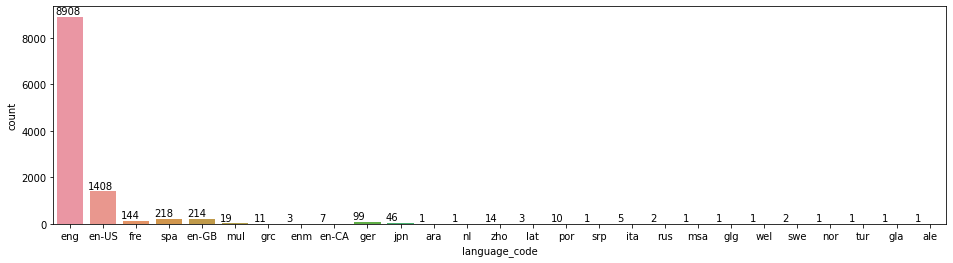

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,4))
ax=sns.countplot(x=df.language_code, data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

In [4]:
df=df.loc[df['language_code'].isin(['eng','en-US','en-GB','en-CA'])].reset_index()

In [5]:
df

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10532,11117,45630,Whores for Gloria,William T. Vollmann,3.69,0140231579,9780140231571,en-US,160,932,111,2/1/1994,Penguin Books
10533,11118,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9781560254416,eng,512,156,20,12/21/2004,Da Capo Press
10534,11119,45633,You Bright and Risen Angels,William T. Vollmann,4.08,0140110879,9780140110876,eng,635,783,56,12/1/1988,Penguin Books
10535,11120,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,0140131965,9780140131963,eng,415,820,95,8/1/1993,Penguin Books


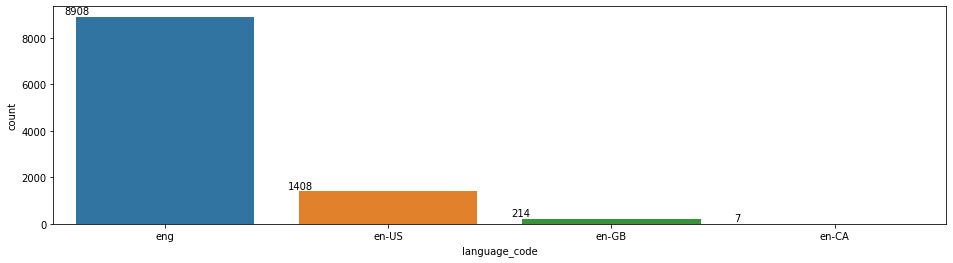

In [6]:
plt.figure(figsize=(16,4))
ax=sns.countplot(x=df.language_code, data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.05, p.get_height()+100))

# Popularity-based Recommender
Create a function named Popularity Recommender and use it to recommend books based on popularity.
Use a weighted rank similar to that used in the IMDB rating example in Lesson 2.

In [7]:
def popularityRecommender (df):
    #Define the minimum vote count 
    minimum_ratings_count=0.75*df['ratings_count'].max()
    
    #define C- the mean rating
    mean_rating = df['average_rating'].mean()
    
    df['weighted_rating']=(((df['ratings_count']/(df['ratings_count']+minimum_ratings_count))*df['average_rating'])+
                            ((minimum_ratings_count/(df['ratings_count']+minimum_ratings_count))*mean_rating))
    recommendations=df.sort_values(by='weighted_rating', ascending=False).head(5)
    
    return(recommendations)

In [8]:
top5=popularityRecommender(df)
top5.head(5)

,index,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,weighted_rating
3,3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,4.185444
0,0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4.172746
1,1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,4.146071
4169,4415,15881,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling/Mary GrandPré,4.42,0439064864,9780439064866,eng,341,2293963,34692,6/2/1999,Arthur A. Levine Books / Scholastic Inc.,4.126539
23,23,34,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. Tolkien,4.36,0618346252,9780618346257,eng,398,2128944,13670,9/5/2003,Houghton Mifflin Harcourt,4.094953


In [9]:
top5Names=top5.head(5).values
print(top5Names)

[[3 5 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)'
  'J.K. Rowling/Mary GrandPré' 4.56 '043965548X' 9780439655484 'eng' 435
  2339585 36325 '5/1/2004' 'Scholastic Inc.' 4.1854440199255585]
 [0 1 'Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
  'J.K. Rowling/Mary GrandPré' 4.57 '0439785960' 9780439785969 'eng' 652
  2095690 27591 '9/16/2006' 'Scholastic Inc.' 4.172746292838123]
 [1 2 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
  'J.K. Rowling/Mary GrandPré' 4.49 '0439358078' 9780439358071 'eng' 870
  2153167 29221 '9/1/2004' 'Scholastic Inc.' 4.1460708244680315]
 [4415 15881 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)'
  'J.K. Rowling/Mary GrandPré' 4.42 '0439064864' 9780439064866 'eng' 341
  2293963 34692 '6/2/1999' 'Arthur A. Levine Books / Scholastic Inc.'
  4.126539405559066]
 [23 34 'The Fellowship of the Ring (The Lord of the Rings  #1)'
  'J.R.R. Tolkien' 4.36 '0618346252' 9780618346257 'eng' 398 2128944
  13670 '9/

In [10]:
top5Names=df['title'].head(5).values
print(top5Names)

['Harry Potter and the Half-Blood Prince (Harry Potter  #6)'
 'Harry Potter and the Order of the Phoenix (Harry Potter  #5)'
 'Harry Potter and the Chamber of Secrets (Harry Potter  #2)'
 'Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)'
 'Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)']


# Content-based Recommender
Create a function named Content-based Recommender and use it to recommend books based on content.

In [11]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
#assign top words based on language - stop words don't get added up in count 
cbr=TfidfVectorizer(stop_words='english')

#scale of the title of books in out dataset
tfidf_matrix = cbr.fit_transform(df['title'])

# assign the instance of our recommender function 
distance_matrix = linear_kernel(tfidf_matrix)

#recreate the indices of our books by removing any dupliactes
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [13]:
indices

title
Harry Potter and the Half-Blood Prince (Harry Potter  #6)           0
Harry Potter and the Order of the Phoenix (Harry Potter  #5)        1
Harry Potter and the Chamber of Secrets (Harry Potter  #2)          2
Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)         3
Harry Potter Boxed Set  Books 1-5 (Harry Potter  #1-5)              4
                                                                ...  
Whores for Gloria                                               10532
Expelled from Eden: A William T. Vollmann Reader                10533
You Bright and Risen Angels                                     10534
The Ice-Shirt (Seven Dreams #1)                                 10535
Poor People                                                     10536
Length: 10537, dtype: int64

In [14]:
distance_matrix.size

111028369

In [15]:
def ContentBasedRecommender(title, indices, distance_matrix):
    id_=indices[title]
    distances=list(enumerate(distance_matrix[id_]))
    distances=sorted(distances, key=lambda x: x[1], reverse=True) #sort by distance function
    distances=distances[1:6]
    recommendations=[distance[0] for distance in distances]
    return df['title'].iloc[recommendations]


In [16]:
# try one
ContentBasedRecommender("Poor People", indices, distance_matrix)

7292                  The Book of Other People
2872    The Working Poor: Invisible in America
3265                            All New People
9017                       A Man of the People
212              We Were Not Like Other People
Name: title, dtype: object

In [17]:
#try another 
ContentBasedRecommender("Notes from a Small Island", indices, distance_matrix)

10236               Small Island
1386                      Island
3788                Small Wonder
9029     The God of Small Things
137              Treasure Island
Name: title, dtype: object

# Content Based Recommender based on Author 
 import additional libraries 

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

In [19]:
#assign stop words based on language 
cbr=TfidfVectorizer(stop_words='english')

#scale the authors of the books in our dataset
tfidf_matrix=cbr.fit_transform(df['authors'])

#assign the instance of our recommender function
distance_matrix = cosine_similarity(tfidf_matrix)

#recreate the indices of our list of authors 
df=df.drop_duplicates(subset="authors")
indices=pd.Series(df.index, index=df['authors']).drop_duplicates()

In [20]:
indices

authors
J.K. Rowling/Mary GrandPré                                    0
J.K. Rowling                                                  2
W. Frederick Zimmerman                                        5
Douglas Adams                                                 7
Douglas Adams/Stephen Fry                                    10
                                                          ...  
Sam R. Watkins                                            10527
Alexander Hunter                                          10528
David Wood/Roald Dahl                                     10529
Dave Crane/Eric Pascarello/Darren James                   10531
William T. Vollmann/Larry McCaffery/Michael Hemmingson    10533
Length: 6359, dtype: int64

In [21]:
distance_matrix

array([[1.        , 1.        , 0.60960511, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.60960511, ..., 0.        , 0.        ,
        0.        ],
       [0.60960511, 0.60960511, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [22]:
distance_matrix.shape

(10537, 10537)

In [23]:
def ContentBasedAuthorRecommender(author, indices, distance_matrix):
    id_=indices[author]
    distances=list(enumerate(distance_matrix[id_]))
    distances=sorted(distances, key=lambda x: x[1], reverse=True) #sort by distance function
    distances=distances[1:6]
    recommendations=[distance[0] for distance in distances]
    return df['authors'].iloc[recommendations]

In [24]:
ContentBasedAuthorRecommender("J.R.R. Tolkien", indices, distance_matrix)

40      Edward P. Jones/Kevin R. Free
42                       Satyajit Das
936                Colleen McCullough
2358                       Andre Duza
2360         Kate Bornstein/Sara Quin
Name: authors, dtype: object

# Submit on Github